In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv('../../data/placement.csv')
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


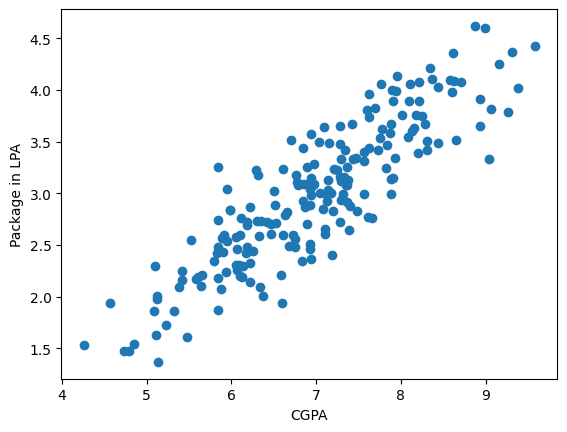

In [3]:
# scatter plot 
plt.scatter(df['cgpa'], df['package'])
plt.xlabel("CGPA")
plt.ylabel("Package in LPA")
plt.show()

In [4]:
# feature selection 
X = df.iloc[:, 0:1]
Y = df.iloc[:, -1]

print(X, Y)

     cgpa
0    6.89
1    5.12
2    7.82
3    7.42
4    6.94
..    ...
195  6.93
196  5.89
197  7.21
198  7.63
199  6.22

[200 rows x 1 columns] 0      3.26
1      1.98
2      3.25
3      3.67
4      3.57
       ... 
195    2.46
196    2.57
197    3.24
198    3.96
199    2.33
Name: package, Length: 200, dtype: float64


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, train_size=0.8, random_state=2)

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
model = LinearRegression()

In [8]:
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [9]:
model.predict(X_test.iloc[2].values.reshape(1,1))

/home/alif/Documents/machine-learning/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2.38464568])

In [10]:
X_test

,cgpa
112,8.58
29,7.15
182,5.88
199,6.22
193,4.57
85,4.79
10,5.32
54,6.86
115,8.35
35,6.87


In [11]:
y_test

112    4.10
29     3.49
182    2.08
199    2.33
193    1.94
85     1.48
10     1.86
54     3.09
115    4.21
35     2.87
12     3.65
92     4.00
13     2.89
126    2.60
174    2.99
2      3.25
44     1.86
3      3.67
113    2.37
14     3.42
23     2.48
25     3.65
6      2.60
134    2.83
165    4.08
173    2.56
45     3.58
65     3.81
48     4.09
122    2.01
178    3.63
64     2.92
9      3.51
57     1.94
78     2.21
71     3.34
128    3.34
176    3.23
131    2.01
53     2.61
Name: package, dtype: float64

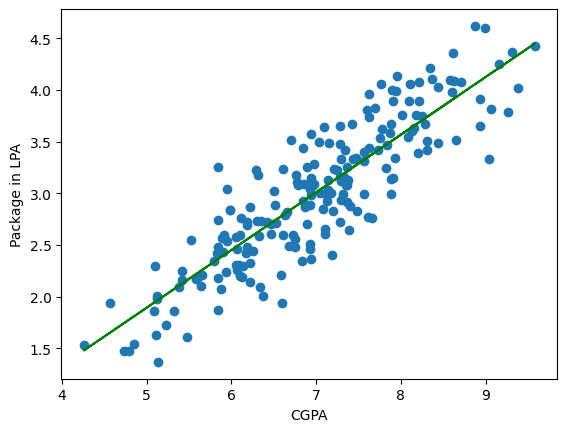

In [12]:
# lets draw the regression line 
# scatter plot 
plt.scatter(df['cgpa'], df['package'])
plt.plot(X_train, model.predict(X_train), color='green')
plt.xlabel("CGPA")
plt.ylabel("Package in LPA")
plt.show()

In [13]:
# from this now lets find the m and b values 
m = model.coef_ # which gives the slop of th eline 

In [14]:
b = model.intercept_ # whhich gives the intercept of b at y axis


In [15]:
# line equation y = mx + b
y = (m*8.58) + b
y

array([3.89111601])

In [16]:
# where m is the weight which means that how much y will be change depend on x 
# where b is the something that is not zero which will be offset 

In [35]:
# core maths behind linear regression 
class MyLinearRegression:
    def __init__(self):
        self.m = None
        self.b = None
        
    def fit(self, X_train, y_train):
        numerator = 0
        denometer = 0 

        for i in range(X_train.shape[0]):
            numerator = numerator + ((X_train[i] - X_train.mean()) * (y_train[i] - y_train.mean()))    
            denometer = denometer + ((X_train[i] - X_train.mean()) * (X_train[i] - X_train.mean()))

        self.m = numerator/denometer
        self.b = (y_train.mean() - (self.m * X_train.mean()))
        
        print(self.m)
        print(self.b)
    def predict(self, X_test):
        pass

In [19]:
# we are getting data from our previos csv 
X = df.iloc[:, 0].values
y = df.iloc[:, 1].values
print(X,y, sep="\n")

[6.89 5.12 7.82 7.42 6.94 7.89 6.73 6.75 6.09 8.31 5.32 6.61 8.94 6.93
 7.73 7.25 6.84 5.38 6.94 7.48 7.28 6.85 6.14 6.19 6.53 7.28 8.31 5.42
 5.94 7.15 7.36 8.1  6.96 6.35 7.34 6.87 5.99 5.9  8.62 7.43 9.38 6.89
 5.95 7.66 5.09 7.87 6.07 5.84 8.63 8.87 9.58 9.26 8.37 6.47 6.86 8.2
 5.84 6.6  6.92 7.56 5.61 5.48 6.34 9.16 7.36 7.6  5.11 6.51 7.56 7.3
 5.79 7.47 7.78 8.44 6.85 6.97 6.94 8.99 6.59 7.18 7.63 6.1  5.58 8.44
 4.26 4.79 7.61 8.09 4.73 6.42 7.11 6.22 7.9  6.79 5.83 6.63 7.11 5.98
 7.69 6.61 7.95 6.71 5.13 7.05 7.62 6.66 6.13 6.33 7.76 7.77 8.18 5.42
 8.58 6.94 5.84 8.35 9.04 7.12 7.4  7.39 5.23 6.5  5.12 5.1  6.06 7.33
 5.91 6.78 7.93 7.29 6.68 6.37 5.84 6.05 7.2  6.1  5.64 7.14 7.91 7.19
 7.91 6.76 6.93 4.85 6.17 5.84 6.07 5.66 7.57 8.28 6.3  6.12 7.37 7.94
 7.08 6.98 7.38 6.47 5.95 8.71 7.13 7.3  5.53 8.93 9.06 8.21 8.6  8.13
 8.65 9.31 6.22 8.01 6.93 6.75 7.32 7.04 6.29 7.09 8.15 7.14 6.19 8.22
 5.88 7.28 7.88 6.31 7.84 6.26 7.35 8.11 6.19 7.28 8.25 4.57 7.89 6.93
 5.89 7.

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2)

In [23]:
X_train.shape[0]

160

In [36]:
model = MyLinearRegression()


In [37]:
model.fit(X_train, y_train=y_train)

0.5579519734250721
-0.8961119222429152
